Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. 800x800, con la textura del tablero de ajedrez

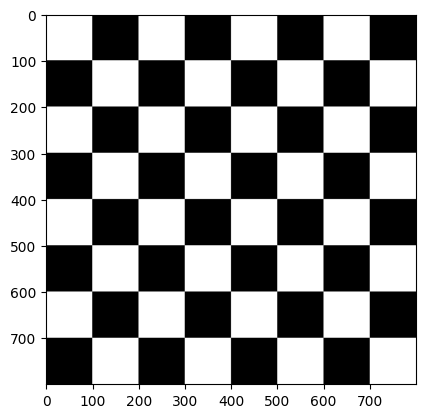

In [96]:
#Dimensiones de la imagen a crear
Bancho = 800
Balto = 800
#Crea una imagen de un único plano, que se interpreta como nivel de gris (0 negro, 255 blanco)
gris_imgB = np.zeros((Bancho,Balto,1), dtype = np.uint8)

#Modifica un par de zonas rectangulares de la imagen
#gris_imgB[vertical,horizontal,0] 0 indica 1 plano, para coloes

filas = 8
columnas = 8
tamaño = 100

for fila in range(filas):
    for columna in range(columnas):
        if (fila+columna)%2==0:
            gris_imgB[fila*tamaño:fila*tamaño+tamaño,columna*tamaño:columna*tamaño+tamaño,0] = 255

#Muestra la imagen con matplotlib
#Es necesario especificar que el mapa de color usado es de grises
plt.imshow(gris_imgB, cmap='gray')
plt.show()

Imagen en color

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

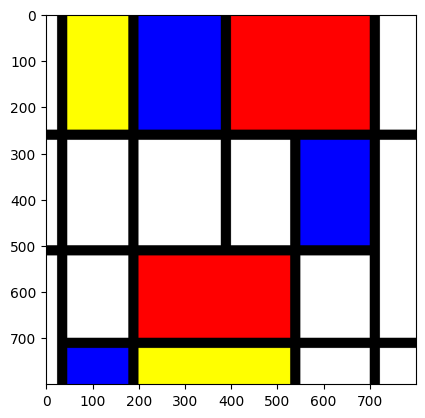

In [44]:
#Dimensiones de la imagen a crear
Cancho = 800
Calto = 800
#Crea una imagen de tres planos
gris_imgC = np.zeros((Cancho,Calto,3), dtype = np.uint8)

gris_imgC.fill(255)

#Lineas Verticales
gris_imgC[0:800,24:46]      =0 
gris_imgC[0:800,700:722]    =0
gris_imgC[0:800,178:200]    =0 
gris_imgC[0:500,378:400]    =0
gris_imgC[250:800,528:550]  =0 

#Lineas Horizontales
gris_imgC[250:272,0:800]    =0 
gris_imgC[500:522,0:700]    =0 
gris_imgC[700:722,24:800]   =0


#Colores Formas
gris_imgC[0:250,46:178]    = [255,255,0] 
gris_imgC[0:250,200:378]    = [0,0,255] 
gris_imgC[0:250,400:700]    = [255,0,0] 
gris_imgC[272:500,550:700]    = [0,0,255] 
gris_imgC[522:700,200:528]    = [255,0,0] 
gris_imgC[722:800,200:528]    = [255,255,0] 
gris_imgC[722:800,46:178]    = [0,0,255] 

#Muestra la imagen con matplotlib
#No es necesario especificar que el mapa de color usado es de grises
plt.imshow(gris_imgC)
plt.show()

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

Versión Acoran

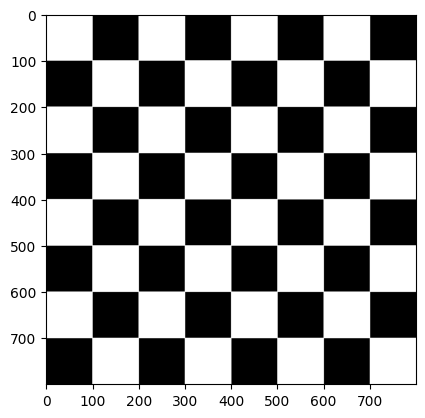

True

In [55]:
#Crea una imagen con tres planos
color_img = np.zeros((800,800,3), dtype = np.uint8)

#Rectángulo con grosor 2
#cv2.rectangle(color_img,(10,10),(ancho-10,int(alto/2)),(0,255,0),2)
#Rectángulo relleno
#cv2.rectangle(color_img,(20,20),(60,40),(0,255,0),-1)


filas = 8
columnas = 8
tamaño = 100

for fila in range(filas):
    for columna in range(columnas):
        if (fila+columna)%2==0:
            cv2.rectangle(color_img, (columna * tamaño, fila * tamaño), ((columna + 1) * tamaño, (fila + 1) * tamaño), (255, 255, 255), -1)
            #gris_imgB[fila*tamaño:fila*tamaño+tamaño,columna*tamaño:columna*tamaño+tamaño,0] = 255


#Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()


#Salva la imagen resultante a disco
cv2.imwrite('imagenCVAjedrez.jpg', color_img)

Versión Louka

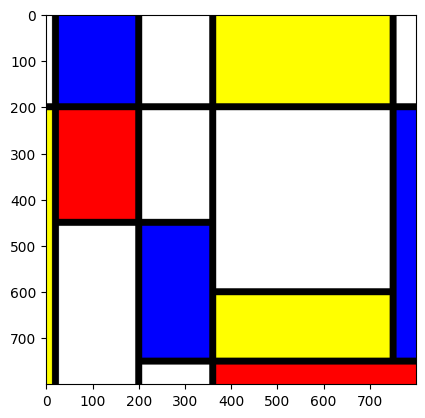

In [3]:
#Crea una imagen con tres planos
color_img = np.zeros((800,800,3), dtype = np.uint8)
color_img.fill(255)

Lancho = 800
Lalto = 800

#Rectángulo relleno
cv2.rectangle(color_img,(200,200),(20,0),(0,0,255), -1)
cv2.rectangle(color_img,(360,200),(750,0),(255,255,0), -1)
cv2.rectangle(color_img,(200,450),(20,200),(255,0,0), -1)
cv2.rectangle(color_img,(360,450),(200,750),(0,0,255), -1)
cv2.rectangle(color_img,(750,600),(360,750),(255,255,0), -1)
cv2.rectangle(color_img,(800,750),(360,800),(255,0,0), -1)
cv2.rectangle(color_img,(800,200),(750,750),(0,0,255), -1)
cv2.rectangle(color_img,(20,800),(0,200),(255,255,0), -1)

#Línea roja vertical de grosor 3
cv2.line(color_img,(int(20),0),(int(20),800),(0,0,0),13)
cv2.line(color_img,(int(200),0),(int(200),800),(0,0,0),13)
cv2.line(color_img,(int(750),0),(int(750),750),(0,0,0),13)
cv2.line(color_img,(int(360),0),(int(360),800),(0,0,0),13)

cv2.line(color_img,(int(800),200),(int(0),200),(0,0,0),13)
cv2.line(color_img,(int(360),450),(int(20),450),(0,0,0),13)
cv2.line(color_img,(int(800),200),(int(0),200),(0,0,0),13)
cv2.line(color_img,(int(800),750),(int(200),750),(0,0,0),13)
cv2.line(color_img,(int(750),600),(int(360),600),(0,0,0),13)


#Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()


TAREA: Modifica de alguna forma los valores de un plano de la imagen

In [13]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        
        # Modifica el canal azul (B) ,De esta manera, solo los píxeles que no eran blancos 
        # originalmente se verán afectados, y los píxeles blancos no cambiarán de color.
        r[r < 200] += 55

        # Clip para asegurarse de que los valores estén en el rango [0, 255]
        #r = np.clip(r, 0, 255)
        

        #Dimensiones
        h, w, c = frame.shape

        #Concateamos en horizontal los tres planos del fotograma por separado y el frame con los 3 planos superpuesto
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Cam3', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
        
        #Ademas mostramos el frame original para observar que uno de los 3 planos cambio
        cv2.imshow('Cam4', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Evento de ratón para mostrar el valor RGB del píxel

In [3]:
# Función que trata eventos de ratón 
def mouse_events(event, x, y, flags, params):
    global px, py, R, G, B
    px = -1
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        #Valores del píxel
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]  

        px = x
        py = y

     
  

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

PARTE 1

In [4]:
vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0
px = -1
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret: 
        # Activa em manejador en el primer fotograma
        if lanzado == 0:
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            lanzado = 1

        # Encuentra los píxeles más claros y oscuros en la imagen
        
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #  Convierte el fotograma actual (frame) de una imagen en color (BGR) a una imagen en escala de grises.
        #  Esto es necesario para calcular los valores más claros y oscuros de la imagen en escala de grises


        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_frame)
        #Basicamente se obtienen los valores más claros y oscuros del frame ademas del su posicion

        # Dibuja círculos en las posiciones de los píxeles más claros y oscuros
        cv2.circle(frame, min_loc, 10, (0, 0, 255), -1)  # Círculo rojo en el píxel más oscuro
        cv2.circle(frame, max_loc, 10, (0, 255, 0), -1)  # Círculo verde en el píxel más claro

        # Muestra valores RGB intentando centrar en el puntero
        if px > -1:
            cv2.putText(frame, '{}'.format(R), (px-45,py-5), font, 0.5, (0, 0, 255), 1)
            cv2.putText(frame, '     {}'.format(G), (px-54,py-5), font, 0.5, (0, 255, 0), 1)
            cv2.putText(frame, '         {}'.format(B), (px-54,py-5), font, 0.5, (255, 0, 0), 1)
            
        cv2.imshow('Cam', frame)   
        
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

QApplication: invalid style override 'adwaita' passed, ignoring it.
	Available styles: Windows, Fusion


PARTE 2: ¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [6]:

def find_min_max_brightness(frame):
    #  Convierte el fotograma actual (frame) de una imagen en color (BGR) a una imagen en escala de grises.
    #  Esto es necesario para calcular los valores más claros y oscuros de la imagen en escala de grises
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    max_brightness = 0
    min_brightness = 255
    max_brightness_coords = (0, 0)
    min_brightness_coords = (0, 0)

    for y in range(0, gray_frame.shape[0], 8):
        for x in range(0, gray_frame.shape[1], 8):
            block = gray_frame[y:y+8, x:x+8]
            brightness = np.mean(block)
            if brightness > max_brightness:
                max_brightness = brightness
                max_brightness_coords = (x, y)
            if brightness < min_brightness:
                min_brightness = brightness
                min_brightness_coords = (x, y)

    return max_brightness_coords, min_brightness_coords

vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0
px = -1
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret: 
        # Activa em manejador en el primer fotograma
        if lanzado == 0:
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            lanzado = 1

        #Encontrar la zona más brillante y la más oscura
        zona_brillante, zona_oscura = find_min_max_brightness(frame)
        
        # Dibujar círculo verde en la zona más clara y circulo rojo en la más oscura
        cv2.circle(frame, (zona_brillante[0] + 4, zona_brillante[1] + 4), 8, (0, 255, 0), -1)
        cv2.circle(frame, (zona_oscura[0] + 4, zona_oscura[1] + 4), 8, (0, 0, 255), -1)
    


        # Muestra valores RGB intentando centrar en el puntero
        if px > -1:
            cv2.putText(frame, '{}'.format(R), (px-45,py-5), font, 0.5, (0, 0, 255), 1)
            cv2.putText(frame, '     {}'.format(G), (px-54,py-5), font, 0.5, (0, 255, 0), 1)
            cv2.putText(frame, '         {}'.format(B), (px-54,py-5), font, 0.5, (255, 0, 0), 1)
            
        cv2.imshow('Cam', frame)   
        
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Haz tu propuesta pop art

In [7]:


# Abre la cámara
vid = cv2.VideoCapture(0)

ncells = 10

while True:
    # Fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Dimensiones originales
        h, w, c = frame.shape
        # Redimensiona
        down_frame = cv2.resize(frame, (int(w/ncells), int(h/ncells)), cv2.INTER_NEAREST)
        # Dimensiones reducidas
        h2, w2, c2 = down_frame.shape

        # Convierte el frame redimensionado a escala de grises
        gray_frame = cv2.cvtColor(down_frame, cv2.COLOR_BGR2GRAY)

        # Crea imagen en negro
        pop_art_frame = np.zeros((h2*ncells, w2*ncells, 1), dtype=np.uint8)

        for y in range(h2):
            for x in range(w2):
                # Calcula el brillo promedio de la zona
                avg_brightness = int(gray_frame[y, x])

                # Calcula el tamaño de las líneas en función del brillo
                line_thickness = max(1, min(int((255 - avg_brightness) / 10), cv2.LINE_AA))

                # Dibuja líneas con el color blanco en la posición correspondiente en el fondo blanco
                cv2.line(pop_art_frame, (x*ncells, y*ncells), ((x+1)*ncells, y*ncells), (255, 255, 255), line_thickness)
                cv2.line(pop_art_frame, (x*ncells, y*ncells), (x*ncells, (y+1)*ncells), (0, 0, 0), line_thickness)


        # Muestra las líneas en función del brillo
        cv2.imshow('Pop Art Lines', pop_art_frame)

    # Detiene la ejecución si se presiona la tecla ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()
